In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_for_train/consumption_and_temperature_data.csv')
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df.set_index('datetime', inplace=True)
print('df.shape', df.shape)
df.head(2)

df.shape (64992, 2)


,one_hour_consumption,one_hour_temperature
datetime,,
2016-01-01 00:00:00,3962.983333,-8.313333
2016-01-01 01:00:00,3808.266667,-8.260000


In [3]:
calendar = pd.read_excel('data_for_train/calendar.xlsx', index_col='day')
print('calendar.shape', calendar.shape)
calendar.head(7)

calendar.shape (2922, 1)


,day_off
day,
2016-01-01,1
2016-01-02,1
2016-01-03,1
2016-01-04,0
2016-01-05,0
2016-01-06,0
2016-01-07,1


In [4]:
# присоединим информацию о выходных и рабочих днях
df['date'] = pd.to_datetime(df.index.date, format='%Y-%m-%d')
df = pd.merge(df, calendar, left_on='date', right_index=True, how='left')
df.drop('date', axis=1, inplace=True)

In [5]:
df.head(2)

,one_hour_consumption,one_hour_temperature,day_off
datetime,,,
2016-01-01 00:00:00,3962.983333,-8.313333,1
2016-01-01 01:00:00,3808.266667,-8.260000,1


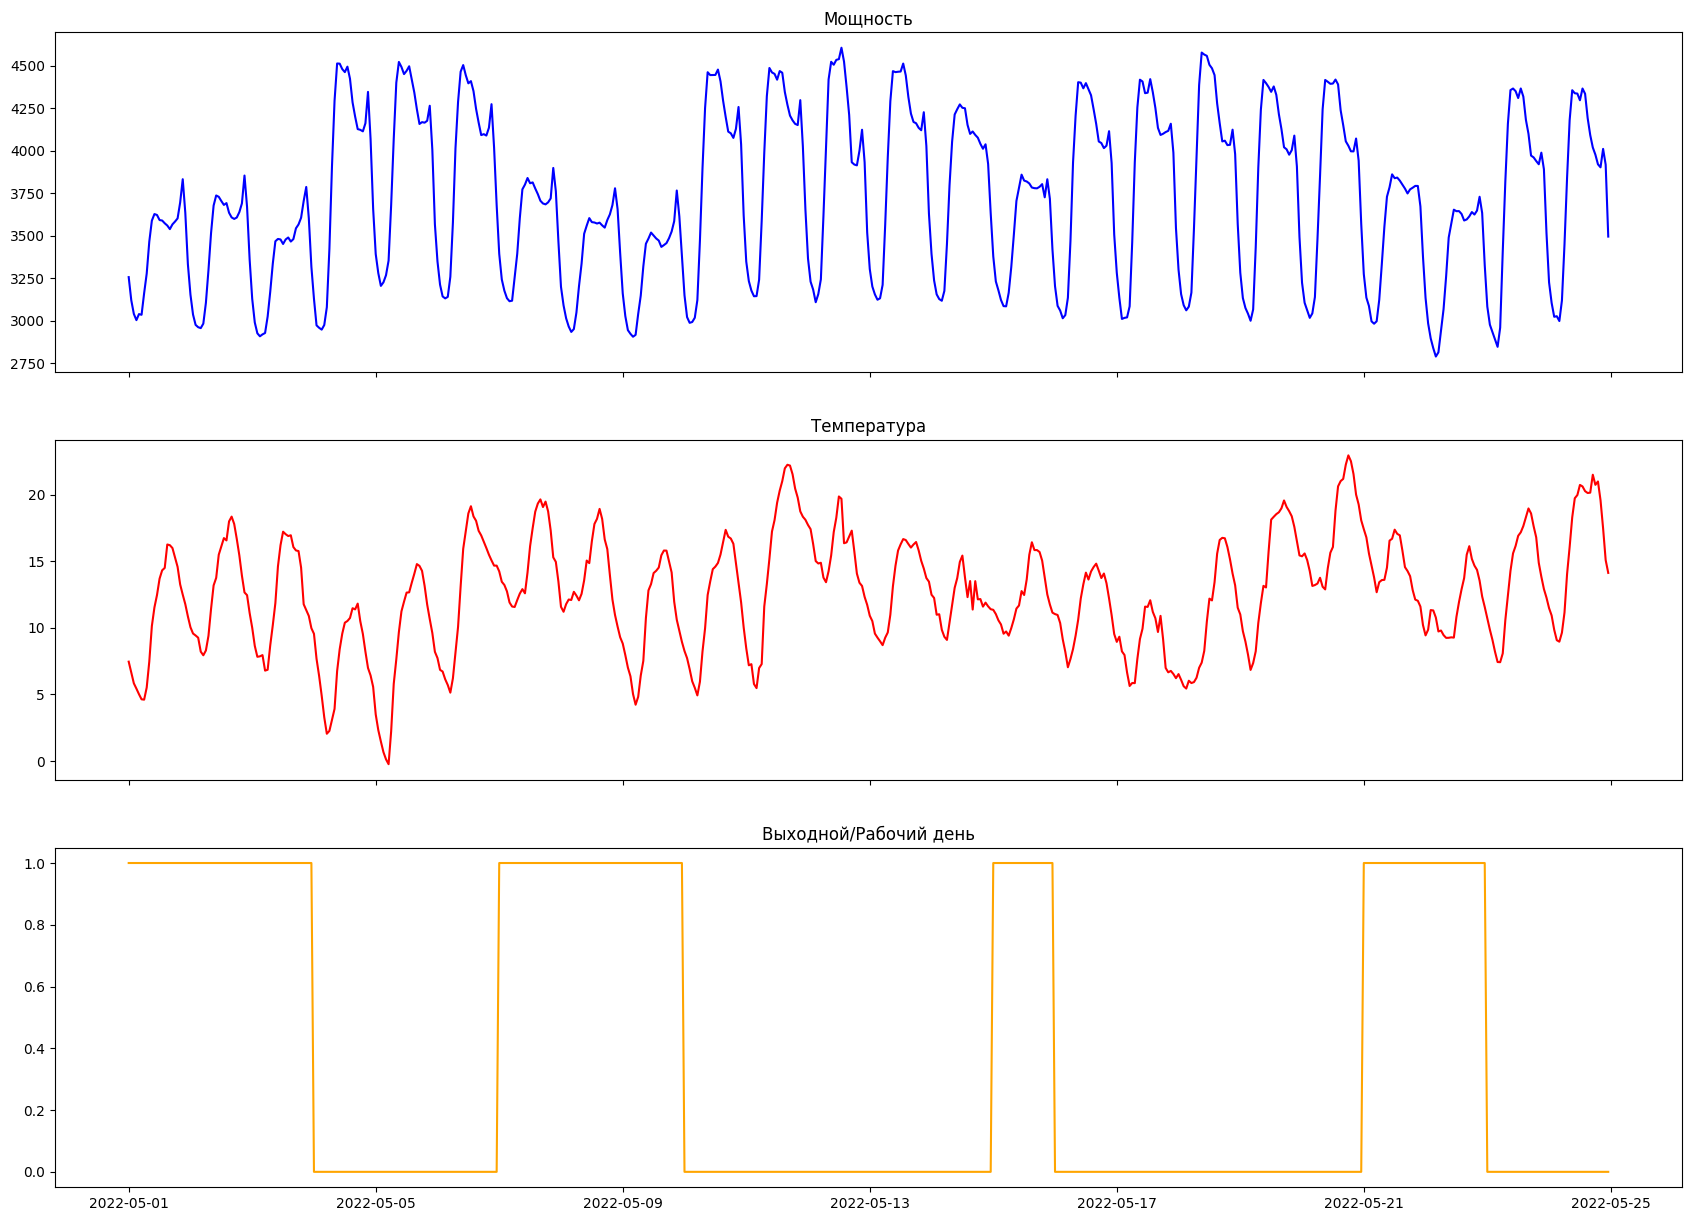

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(21, 15), sharex=True)

ax1.plot(df.loc['2022-05-01': '2022-05-24', 'one_hour_consumption'],
         c='blue')
ax1.set_title('Мощность')

ax2.plot(df.loc['2022-05-01': '2022-05-24', 'one_hour_temperature'],
         c='red')
ax2.set_title('Температура')

ax3.plot(df.loc['2022-05-01': '2022-05-24', 'day_off'],
         c='orange')
ax3.set_title('Выходной/Рабочий день')



plt.show()